In [2]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = data.shape[1:]
inp = keras.Input(shape=input_shape)
convs=[]

parallel_kernels = [3,5,7]

for i in range(len(parallel_kernels)):
    
    conv = layers.Conv2D(128,parallel_kernels[i],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)
    
out = layers.Concatenate()(convs)
conv_model = keras.Model(inp,out)

model = keras.Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_5 (Functional)    (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 98, 98, 64)        221248    
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)       

In [25]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [28]:
checkpoint = keras.callbacks.ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
55/55 [==============================] - ETA: 0s - loss: 0.6142 - accuracy: 0.7289WARNING:tensorflow:From C:\Users\farha\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
55/55 [==============================] - 220s 4s/step - loss: 0.6142 - accuracy: 0.7289 - val_loss: 0.6022 - val_accuracy: 0.7113
Epoch 2/20
55/55 [==============================] - 208s 4s/step - loss: 0.5947 - accuracy: 0.7370 - val_loss: 0.6058 - val_accuracy: 0.7113
Epoch 3/20
55/55 [==============================] - 208s 4s/step - loss: 0.5920 - accuracy: 0.7370 - v

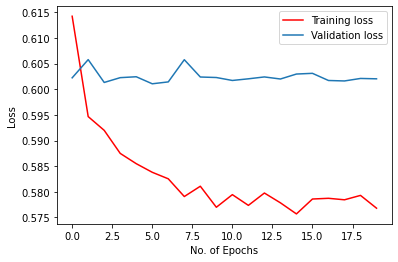

In [30]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

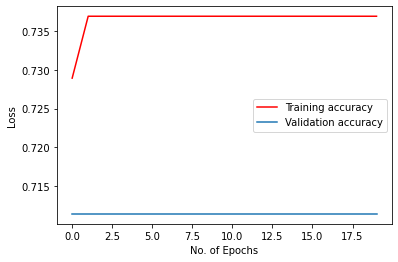

In [31]:
plt.plot(history.history['accuracy'],'r',label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 6s 803ms/step - loss: 0.6097 - accuracy: 0.7037
[0.6097164154052734, 0.7037037014961243]
